In [2]:
%load_ext google.colab.data_table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [3]:
users = pd.read_csv('/content/drive/MyDrive/Datasets/Movielens 1M/users.csv')
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455


In [4]:
movies = pd.read_csv('/content/drive/MyDrive/Datasets/Movielens 1M/movies.csv', encoding= 'unicode_escape' )
movies.head()

,movie_id,movie,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings = pd.read_csv('/content/drive/MyDrive/Datasets/Movielens 1M/ratings.csv')
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


# Feature Engineering

In [6]:
df = pd.merge(ratings, movies, on='movie_id')
df.head()

,user_id,movie_id,rating,timestamp,movie,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [14]:
df

,user_id,movie_id,rating,timestamp,movie,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [12]:
df.groupby('movie')['rating'].mean()

movie
$1,000,000 Duck (1971)                                  3.027027
'Night Mother (1986)                                    3.371429
'Til There Was You (1997)                               2.692308
'burbs, The (1989)                                      2.910891
...And Justice for All (1979)                           3.713568
                                                          ...   
Zed & Two Noughts, A (1985)                             3.413793
Zero Effect (1998)                                      3.750831
Zero Kelvin (Kjü¾¦¼rlighetens kjü¾¼tere) (1995)    3.500000
Zeus and Roxanne (1997)                                 2.521739
eXistenZ (1999)                                         3.256098
Name: rating, Length: 3706, dtype: float64

In [13]:
df.groupby('movie')['rating'].count()

movie
$1,000,000 Duck (1971)                                   37
'Night Mother (1986)                                     70
'Til There Was You (1997)                                52
'burbs, The (1989)                                      303
...And Justice for All (1979)                           199
                                                       ... 
Zed & Two Noughts, A (1985)                              29
Zero Effect (1998)                                      301
Zero Kelvin (Kjü¾¦¼rlighetens kjü¾¼tere) (1995)      2
Zeus and Roxanne (1997)                                  23
eXistenZ (1999)                                         410
Name: rating, Length: 3706, dtype: int64

In [24]:
avg_count = pd.DataFrame(df.groupby('movie')['rating'].mean())
avg_count['number_of_ratings'] = df.groupby('movie')['rating'].count()
avg_count.head()

,rating,number_of_ratings
movie,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


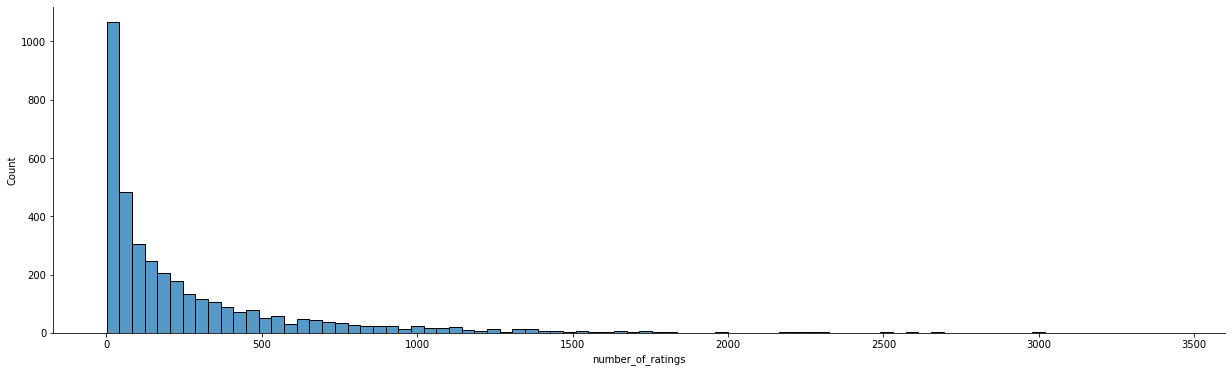

In [35]:
plt.figure(figsize=(21,6))
sns.histplot(avg_count['number_of_ratings'], palette='Blues');
sns.despine()

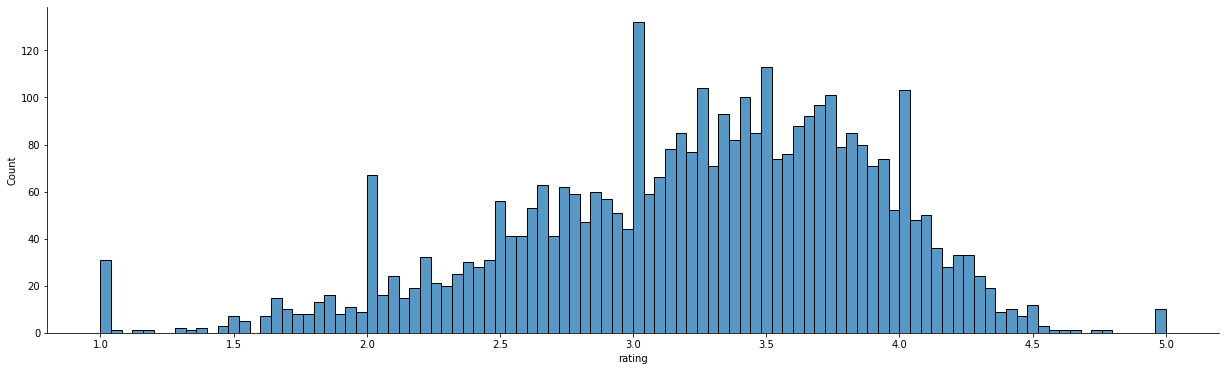

In [37]:
plt.figure(figsize=(21,6))
sns.histplot(avg_count['rating'], bins=100, palette='Blues');
sns.despine()

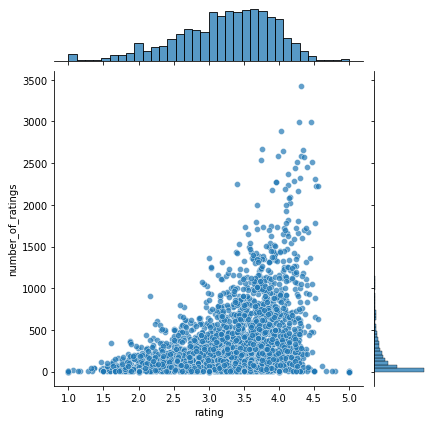

In [51]:
sns.jointplot(data=avg_count, x='rating', y='number_of_ratings', alpha=0.7);

# Creating a Pivot Table

In [55]:
moviemat = df.pivot_table(index='user_id', columns='movie', values='rating')
moviemat.head()

movie,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",187 (1997),2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010 (1984),24 7: Twenty Four Seven (1997),24-hour Woman (1998),28 Days (2000),3 Ninjas: High Noon On Mega Mountain (1998),3 Strikes (2000),"301, 302 (1995)","39 Steps, The (1935)","400 Blows, The (Les Quatre cents coups) (1959)",42 Up (1998),52 Pick-Up (1986),54 (1998),"7th Voyage of Sinbad, The (1958)",8 1/2 (1963),8 1/2 Women (1999),8 Heads in a Duffel Bag (1997),8 Seconds (1994),8MM (1999),A Chef in Love (1996),Abbott and Costello Meet Frankenstein (1948),"Abominable Snowman, The (1957)",About Adam (2000),About Last Night... (1986),...,Wonderland (1997),Wonderland (1999),Woo (1998),"Wood, The (1999)","Wooden Man's Bride, The (Wu Kui) (1994)",Working Girl (1988),"World Is Not Enough, The (1999)","World of Apu, The (Apur Sansar) (1959)","Wrong Man, The (1956)","Wrong Trousers, The (1993)",Wrongfully Accused (1998),Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),X: The Unknown (1956),Xiu Xiu: The Sent-Down Girl (Tian yu) (1998),Yankee Zulu (1994),"Yards, The (1999)","Year My Voice Broke, The (1987)",Year of Living Dangerously (1982),Year of the Horse (1997),Yellow Submarine (1968),Yojimbo (1961),You Can't Take It With You (1938),You So Crazy (1994),You've Got Mail (1998),Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjü¾¦¼rlighetens kjü¾¼tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
avg_count.sort_values('number_of_ratings', ascending=False)

,rating,number_of_ratings
movie,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672
...,...,...
Target (1995),4.000000,1
I Don't Want to Talk About It (De eso no se habla) (1993),4.000000,1
An Unforgettable Summer (1994),3.000000,1


In [58]:
star_wars_4_ratings = moviemat['Star Wars: Episode IV - A New Hope (1977)']

In [65]:
corr_star_wars_4_ratings = pd.DataFrame(moviemat.corrwith(star_wars_4_ratings), columns=['correlation'])
corr_star_wars_4_ratings.dropna(inplace=True)
corr_star_wars_4_ratings.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation
movie,
"$1,000,000 Duck (1971)",0.090778
'Night Mother (1986),0.104399
'Til There Was You (1997),0.024925
"'burbs, The (1989)",0.107898
...And Justice for All (1979),0.020055


In [68]:
corr_star_wars_4_ratings = corr_star_wars_4_ratings.join(avg_count['number_of_ratings'])
corr_star_wars_4_ratings.head()

,correlation,number_of_ratings
movie,,
"$1,000,000 Duck (1971)",0.090778,37
'Night Mother (1986),0.104399,70
'Til There Was You (1997),0.024925,52
"'burbs, The (1989)",0.107898,303
...And Justice for All (1979),0.020055,199
...,...,...
Your Friends and Neighbors (1998),-0.001888,109
"Zed & Two Noughts, A (1985)",0.054670,29
Zero Effect (1998),0.187331,301


In [72]:
corr_star_wars_4_ratings[corr_star_wars_4_ratings['number_of_ratings'] > 100].sort_values('correlation', ascending=False)

,correlation,number_of_ratings
movie,,
Star Wars: Episode IV - A New Hope (1977),1.000000,2991
Star Wars: Episode V - The Empire Strikes Back (1980),0.661552,2990
Star Wars: Episode VI - Return of the Jedi (1983),0.574808,2883
Raiders of the Lost Ark (1981),0.421425,2514
Dracula (1958),0.398710,102
...,...,...
Dirty Work (1998),-0.217421,135
Sleepwalkers (1992),-0.222358,113
Priest (1994),-0.228204,143


In [69]:
corr_star_wars_4_ratings.sort_values('number_of_ratings', ascending=False)

,correlation,number_of_ratings
movie,,
American Beauty (1999),0.068348,3428
Star Wars: Episode IV - A New Hope (1977),1.000000,2991
Star Wars: Episode V - The Empire Strikes Back (1980),0.661552,2990
Star Wars: Episode VI - Return of the Jedi (1983),0.574808,2883
Jurassic Park (1993),0.240746,2672
...,...,...
Tokyo Fist (1995),-1.000000,2
Hangmen Also Die (1943),1.000000,2
Born to Win (1971),-1.000000,2
